In [38]:
import numpy as np 
from scipy.optimize import rosen, shgo
from scipy.interpolate import LinearNDInterpolator
from tqdm.notebook import trange, tqdm
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from skimage.feature import match_template
from sklearn.metrics import mean_squared_error
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mutual_info_score
import scipy
import random
from numpy import linalg as LA
import imageio
from PIL import ImageChops
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import scipy.spatial.distance as dist
from numpy import asarray
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
from scipy.ndimage.interpolation import shift
from skimage import data, img_as_float
from scipy.optimize import differential_evolution
from sklearn import preprocessing
import scipy.ndimage as snd
import h5py
import sklearn.feature_selection as sk
from sklearn.feature_selection import mutual_info_classif as MIC
import time
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution
from scipy.optimize import fmin_powell
from scipy.optimize import dual_annealing
plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['image.interpolation'] = 'nearest'
np.set_printoptions(precision=5,suppress=True)
import os
cwd = os.getcwd()
print(cwd)

C:\Users\bjqb7h


In [39]:
path_Semseg = 'C:/Users/bjqb7h/Downloads/Thesis2022/SEMSEGGPS'
log  = '/AtCityBMW_Applanix-20220601T115459Z469'
semsegpath ='C:/Users/bjqb7h/Downloads/Thesis2022/semsegimage'
path_GPS = 'C:/Users/bjqb7h/Downloads/Thesis2022/NUMPY/New/'
log_GPS  = 'AtCityBMW_Applanix-20220601T115459Z469GPSARNOISE1'
log_DGPS = 'AtCityBMW_Applanix-20220601T115459Z469DGPSWNSYAW101'
NewSemseg ='C:/Users/bjqb7h/Downloads/Thesis2022/Semseg Images'

h5f = h5py.File(path_Semseg +log+'.h5','r')
dset = h5f.get('grid_prediction')

GPS = h5py.File(path_GPS+log_GPS+'.hdf5','r')
GPSDSET = GPS.get(log+'/Image data')

#Importing DGPS MAPS
h5fDGPS = h5py.File(path_GPS+log_DGPS+'.hdf5','r')
dset5 = h5fDGPS.get(log+'/Image data')

A=len(GPSDSET)
SemsegData = np.reshape(dset,(A,160,160,2))

print(GPSDSET.shape)

NewSemseg= h5py.File(NewSemseg+log+'Semseg'+'.hdf5','r')
NSem= NewSemseg.get(log+'/Image data')
print(NSem.shape)


(2093, 160, 160, 4)
(2093, 160, 160, 3)


1921


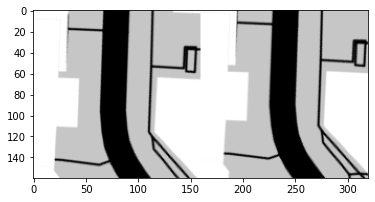

In [40]:
P=random.randint(0,A)


#USING GPS HDF5 dATASET
t1_slice = GPSDSET[P,:,:,1]
t1_slice = np.flip(t1_slice, axis=1)
GPS_data = t1_slice


# FreeSemseg=np.rot90(SemsegData[P,:,:,0],2)
# OccSemseg=np.rot90(SemsegData[P,:,:,1],2)
# NewSemseg = np.rot90(NSem[P,:,:,1],2)

# #DGPS values
t3_slice = dset5[P,:,:,1]
t3_slice = np.flip(t3_slice, axis=1)
DGPS_data = t3_slice



# GPS_data = GPS_data/GPS_data.max()
# Semseg_data = NewSemseg/NewSemseg.max()
#OLDSEMSEG = OLDSEMSEG/OLDSEMSEG.max()
DGPS_data=DGPS_data/DGPS_data.max()
GPS_data = GPS_data/GPS_data.max()
# OccSemseg=OccSemseg/OccSemseg.max()


#plt.imshow(np.hstack((Semseg_data,GPS_data,DGPS_data)))
plt.imshow(np.hstack((GPS_data,DGPS_data)))
print(P)

In [41]:
Tdx = np.load(f'C:\\Users\\bjqb7h\\Downloads\\Thesis2022\\GT TRANSLATIONS\\dxT.npy')
Tdy = np.load(f'C:\\Users\\bjqb7h\\Downloads\\Thesis2022\\GT TRANSLATIONS\\dyT.npy') 
Tdx=Tdx/0.0000034
Tdy=Tdy/0.0000038

In [664]:
dx,dy,MI=main_mi_reg(GPS_data,DGPS_data)
print(dx,dy)
print(Tdx[P],Tdy[P])

c:\users\bjqb7h\miniconda3\envs\perl\lib\site-packages\ipykernel_launcher.py:49: OptimizeWarning: Unknown solver options: maxfevint


Optimization terminated successfully.
         Current function value: -0.737789
         Iterations: 2
         Function evaluations: 161
-2.9720509766274685 -1.4695003522750412
4.987497420669346 0.7357570741355001


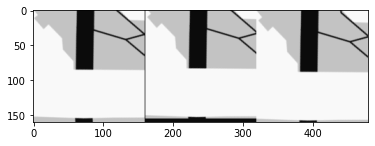

In [665]:
Oshift = shift(DGPS_data,(-Tdx[P],Tdy[P]))
plt.imshow(np.hstack((GPS_data,Oshift,DGPS_data)))

In [668]:
Ishift = shift(GPS_data,(-dx,-dy))
Ishift2 = shift(GPS_data,(Tdx[P],-Tdy[P]))
Ushift = fancy_xy_trans_slice(GPS_data,(dx,dy))

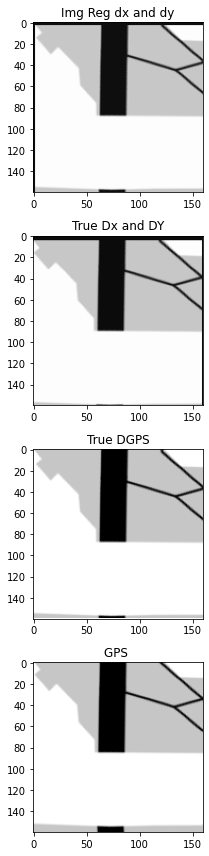

In [669]:
# Create a figure and three subplots
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(12, 12))

# Plot the first subplot
ax1.imshow(Ishift)
ax1.set_title('Img Reg dx and dy')

# Plot the second subplot
ax2.imshow(Ishift2)
ax2.set_title('True Dx and DY')

# Plot the third subplot
ax3.imshow(DGPS_data)
ax3.set_title('True DGPS')

ax4.imshow(GPS_data)
ax4.set_title('GPS ')



# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

We expect that the correlation will be high and positive when the images are well matched. Our mismatch measure, on the other hand, should be low when the images are well-matched. So, we can use the negative correlation as our mismatch measure:

Sørensen–Dice coefficient is a statistic used to gauge the similarity of two samples.  
{ DSC= {2|intersection(X,Y)|}/{|X|+|Y|}}}

Zhang, Boyang, et al. "A mutual information based sub-pixel registration method for image super resolution." Intelligent Information Hiding and Multimedia Signal Processing, 2009. IIH-MSP'09. Fifth International Conference on. IEEE, 2009.

In [42]:


BOUNDS = [(-12,12), (-12,12)]  # Bounds (in pixels) supported by mutual information based correlator


# #Bayes theorem
def mutual_information(ref_image, cmp_image, bins=216, normed=True):
    """
    :param ref_image_crop: ndarray, cropped image from the center of reference image, needs to be same size as `cmp_image`
    :param cmp_image: ndarray, comparison image data data
    :param bins: number of histogram bins
    :param normed: return normalized mutual information
    :return: mutual information values
    """
    
    # Compute dynamic bin size based on data range
    bin_edges = np.linspace(0, 1, bins+1)
    
    joint_hist,_,_ = np.histogram2d(ref_image.flatten(), cmp_image.flatten(), bins=[bin_edges, bin_edges],range=[(0,1),(0,1)])
    ref_hist = joint_hist.sum(axis=0)
    cmp_hist = joint_hist.sum(axis=1)
    joint_ent = entropy(joint_hist)
    ref_ent = entropy(ref_hist)
    cmp_ent = entropy(cmp_hist)
    mutual_info = ref_ent + cmp_ent - joint_ent
    if normed:
        mutual_info = mutual_info / np.sqrt(ref_ent * cmp_ent)
    return mutual_info


def obj_func(dx_dy, ref_image, cmp_image):
    dx,dy=dx_dy
    shifted_img = shift(ref_image,(-dx,-dy))
    #shifted_img  = fancy_xy_trans_slice(ref_image,(-dx,-dy))
    Z=mutual_information(shifted_img, cmp_image)
#     print(f"Current mutual information: {Z}")
    return -Z


def main_mi_reg(ref_image, cmp_image,bounds=BOUNDS):
    """
    Correlator based onMutual Information Algorithm
    :param ref_image: ndarray, containing reference image data
    :param cmp_image: ndarray, containing comparison image data
    :param bounds: sequence, bounds paramater in scipy.optimize.differential_evolution
    :return: (residual in X, residual in Y, match height)
    """
    #res = differential_evolution(obj_func, bounds, args=(ref_image, cmp_image),init="sobol",x0=[0,0],tol=1e-1)
    #opt_res=shgo(obj_func, bounds, args=(ref_image, cmp_image), sampling_method='sobol',n=64, iters=5)
    #res = differential_evolution(obj_func, bounds, args=(ref_image, cmp_image), init="sobol",strategy = 'rand1bin',x0=[0,0],updating='deferred',maxiter=2500)
    res = minimize(obj_func, [0,0], args=(ref_image, cmp_image), bounds=BOUNDS, method='Powell', options={'xtol': 1e-14,'ftol':1e-14,'disp': True,'maxiter':3000,'maxfevint':3000})
    # Get the results
    dx = res.x[0]
    dy = res.x[1]
    MI = -res.fun
    return dx,dy,MI
    

def entropy(img_hist):
    """
    :param img_hist: Array containing image histogram
    :return: image entropy
    """
    img_hist = img_hist /(np.sum(img_hist))
    img_hist = img_hist[np.nonzero(img_hist)]
    return -np.sum(img_hist * np.log2(img_hist))


def fancy_xy_trans_slice(img_slice, x_y_trans):
    """ Return copy of `img_slice` translated by `x_y_trans` voxels
    Parameters
     ----------
     img_slice : array shape (M, N)
         2D image to transform with translation `x_vox_trans`
     x_y_trans : float
         Number of pixels (voxels) to translate `img_slice`; can be
         positive or negative, and does not need to be integer value.
     """
    # Resample image using bilinear interpolation (order=1)
    x_y_trans = np.array(x_y_trans)
    trans_slice = snd.affine_transform(img_slice, [1, 1], x_y_trans, order=1)
    return trans_slice



SSIM is used for measuring the similarity between two images. The SSIM index is a full reference metric; in other words, the measurement or prediction of image quality is based on an initial uncompressed or distortion-free image as reference. 1 for perfect fit.

Root Mean Square Error (RMSE) measures the amount of change per pixel due to the processing. RMSE values are non-negative and a value of 0 means the image or videos being compared are identical.

In [43]:
import cProfile
dy1 = np.zeros((A,1),dtype =np.float64)
dx1 = np.zeros((A,1),dtype =np.float64)
MI1 = np.zeros((A,1),dtype =np.float64)
t1_set_norm = np.zeros((A,160,160),dtype =np.float64)
t3_set_norm = np.zeros((A,160,160),dtype =np.float64)
t1_slice = GPSDSET[:,:,:,1]
t1_slice = np.flip(t1_slice, axis=1)
GPS_data = t1_slice
t3_slice = dset5[:,:,:,1]
t3_slice = np.flip(t3_slice, axis=1)
DGPS_data = t3_slice
DGPS_data=DGPS_data/DGPS_data.max()
GPS_data = GPS_data/GPS_data.max()

for i in range(A):
    t1_set_norm[i,:,:] = preprocessing.normalize((GPS_data[i]))
    t3_set_norm[i,:,:] = preprocessing.normalize((DGPS_data[i]))



(2081, 160, 160)
1.0 0.0
(2081, 160, 160)
1.0 0.0


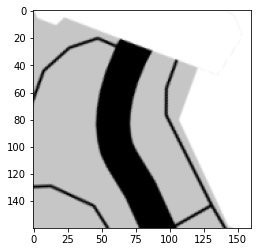

In [14]:
np.save(r'C:\Users\bjqb7h\Downloads\Thesis2022\GPS Normalized\\'+'GPS_Norm2',t1_set_norm)
np.save(r'C:\Users\bjqb7h\Downloads\Thesis2022\DGPS Normalized\\'+'DGPS_Norm2',t3_set_norm)
dxT = np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\GT TRANSLATIONS\\dxT.npy')
dyT = np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\GT TRANSLATIONS\\dyT.npy')
print(GPS_data.shape)
print(GPS_data.max(),GPS_data.min())

print(DGPS_data.shape)
print(DGPS_data.max(),DGPS_data.min())
plt.imshow(GPS_data[1])

In [44]:
def main():
    for T in trange(A):

        dx,dy,MI=main_mi_reg(GPS_data[T],DGPS_data[T])
        dx1[T,:]=dx
        dy1[T,:]=dy
        MI1[T,:]=MI
        
       
        print("Frame",T)
        print(dx1[T],dy1[T],MI1[T])
        plt.show()
        
cProfile.run('main()')

  0%|          | 0/2093 [00:00<?, ?it/s]

c:\users\bjqb7h\miniconda3\envs\perl\lib\site-packages\ipykernel_launcher.py:49: OptimizeWarning: Unknown solver options: maxfevint


Optimization terminated successfully.
         Current function value: -0.957467
         Iterations: 1
         Function evaluations: 96
Frame 0
[0.00022] [-0.00011] [0.95747]
Optimization terminated successfully.
         Current function value: -0.956969
         Iterations: 1
         Function evaluations: 87
Frame 1
[0.00021] [-0.00012] [0.95697]
Optimization terminated successfully.
         Current function value: -0.693081
         Iterations: 3
         Function evaluations: 266
Frame 2
[-7.94826] [-1.96992] [0.69308]
Optimization terminated successfully.
         Current function value: -0.692443
         Iterations: 4
         Function evaluations: 348
Frame 3
[-7.95054] [-1.97376] [0.69244]
Optimization terminated successfully.
         Current function value: -0.687149
         Iterations: 5
         Function evaluations: 452
Frame 4
[-7.92188] [-1.92151] [0.68715]
Optimization terminated successfully.
         Current function value: -0.686059
         Iterations: 3
     

Optimization terminated successfully.
         Current function value: -0.752062
         Iterations: 3
         Function evaluations: 232
Frame 46
[-5.99655] [-1.96592] [0.75206]
Optimization terminated successfully.
         Current function value: -0.747807
         Iterations: 4
         Function evaluations: 335
Frame 47
[-5.92991] [-1.95973] [0.74781]
Optimization terminated successfully.
         Current function value: -0.751030
         Iterations: 2
         Function evaluations: 179
Frame 48
[-5.99994] [-1.99105] [0.75103]
Optimization terminated successfully.
         Current function value: -0.745725
         Iterations: 5
         Function evaluations: 439
Frame 49
[-5.94263] [-1.98479] [0.74573]
Optimization terminated successfully.
         Current function value: -0.738349
         Iterations: 5
         Function evaluations: 479
Frame 50
[-5.91773] [-1.96386] [0.73835]
Optimization terminated successfully.
         Current function value: -0.732539
         Iterations

Optimization terminated successfully.
         Current function value: -0.708299
         Iterations: 3
         Function evaluations: 263
Frame 92
[-2.84914] [-1.96484] [0.7083]
Optimization terminated successfully.
         Current function value: -0.714084
         Iterations: 5
         Function evaluations: 458
Frame 93
[-2.81906] [-1.96734] [0.71408]
Optimization terminated successfully.
         Current function value: -0.719790
         Iterations: 3
         Function evaluations: 241
Frame 94
[-2.72795] [-1.96646] [0.71979]
Optimization terminated successfully.
         Current function value: -0.717498
         Iterations: 3
         Function evaluations: 260
Frame 95
[-2.57289] [-1.92398] [0.7175]
Optimization terminated successfully.
         Current function value: -0.717919
         Iterations: 3
         Function evaluations: 223
Frame 96
[-2.48819] [-1.92488] [0.71792]
Optimization terminated successfully.
         Current function value: -0.726145
         Iterations: 

Optimization terminated successfully.
         Current function value: -0.735472
         Iterations: 5
         Function evaluations: 475
Frame 138
[0.83938] [-1.96448] [0.73547]
Optimization terminated successfully.
         Current function value: -0.729976
         Iterations: 4
         Function evaluations: 348
Frame 139
[0.57052] [-1.85426] [0.72998]
Optimization terminated successfully.
         Current function value: -0.728409
         Iterations: 3
         Function evaluations: 247
Frame 140
[0.5266] [-1.87853] [0.72841]
Optimization terminated successfully.
         Current function value: -0.729399
         Iterations: 3
         Function evaluations: 239
Frame 141
[0.6186] [-1.88975] [0.7294]
Optimization terminated successfully.
         Current function value: -0.734497
         Iterations: 4
         Function evaluations: 341
Frame 142
[0.81962] [-1.97117] [0.7345]
Optimization terminated successfully.
         Current function value: -0.736681
         Iterations: 3


Optimization terminated successfully.
         Current function value: -0.715598
         Iterations: 2
         Function evaluations: 154
Frame 184
[0.33216] [-1.88147] [0.7156]
Optimization terminated successfully.
         Current function value: -0.714162
         Iterations: 3
         Function evaluations: 293
Frame 185
[0.60082] [-1.62035] [0.71416]
Optimization terminated successfully.
         Current function value: -0.719665
         Iterations: 3
         Function evaluations: 248
Frame 186
[0.67295] [-1.87558] [0.71967]
Optimization terminated successfully.
         Current function value: -0.706220
         Iterations: 5
         Function evaluations: 417
Frame 187
[0.82602] [-1.626] [0.70622]
Optimization terminated successfully.
         Current function value: -0.720888
         Iterations: 5
         Function evaluations: 452
Frame 188
[0.83151] [-1.94061] [0.72089]
Optimization terminated successfully.
         Current function value: -0.705005
         Iterations: 3

Optimization terminated successfully.
         Current function value: -0.701794
         Iterations: 4
         Function evaluations: 338
Frame 230
[0.84638] [-1.66146] [0.70179]
Optimization terminated successfully.
         Current function value: -0.730791
         Iterations: 3
         Function evaluations: 288
Frame 231
[0.82349] [-1.95688] [0.73079]
Optimization terminated successfully.
         Current function value: -0.733144
         Iterations: 4
         Function evaluations: 416
Frame 232
[0.85869] [-1.9656] [0.73314]
Optimization terminated successfully.
         Current function value: -0.731619
         Iterations: 6
         Function evaluations: 527
Frame 233
[0.90508] [-1.96424] [0.73162]
Optimization terminated successfully.
         Current function value: -0.732663
         Iterations: 3
         Function evaluations: 281
Frame 234
[0.85009] [-1.96636] [0.73266]
Optimization terminated successfully.
         Current function value: -0.734099
         Iterations:

Optimization terminated successfully.
         Current function value: -0.731405
         Iterations: 3
         Function evaluations: 257
Frame 276
[0.80019] [-1.95464] [0.73141]
Optimization terminated successfully.
         Current function value: -0.732182
         Iterations: 4
         Function evaluations: 329
Frame 277
[0.79521] [-1.91157] [0.73218]
Optimization terminated successfully.
         Current function value: -0.732546
         Iterations: 4
         Function evaluations: 360
Frame 278
[0.74877] [-1.95136] [0.73255]
Optimization terminated successfully.
         Current function value: -0.731712
         Iterations: 4
         Function evaluations: 350
Frame 279
[0.81021] [-1.96277] [0.73171]
Optimization terminated successfully.
         Current function value: -0.732124
         Iterations: 4
         Function evaluations: 381
Frame 280
[0.8156] [-1.9552] [0.73212]
Optimization terminated successfully.
         Current function value: -0.732252
         Iterations: 

Optimization terminated successfully.
         Current function value: -0.733686
         Iterations: 4
         Function evaluations: 411
Frame 322
[0.84292] [-1.96033] [0.73369]
Optimization terminated successfully.
         Current function value: -0.734185
         Iterations: 3
         Function evaluations: 310
Frame 323
[0.84654] [-1.97369] [0.73418]
Optimization terminated successfully.
         Current function value: -0.728445
         Iterations: 2
         Function evaluations: 144
Frame 324
[0.73306] [-1.85595] [0.72845]
Optimization terminated successfully.
         Current function value: -0.731880
         Iterations: 3
         Function evaluations: 248
Frame 325
[0.67264] [-1.85697] [0.73188]
Optimization terminated successfully.
         Current function value: -0.731963
         Iterations: 5
         Function evaluations: 447
Frame 326
[0.66165] [-1.87661] [0.73196]
Optimization terminated successfully.
         Current function value: -0.735111
         Iterations

Optimization terminated successfully.
         Current function value: -0.739149
         Iterations: 3
         Function evaluations: 263
Frame 368
[-0.04921] [-1.93866] [0.73915]
Optimization terminated successfully.
         Current function value: -0.736960
         Iterations: 2
         Function evaluations: 134
Frame 369
[-0.10173] [-1.95079] [0.73696]
Optimization terminated successfully.
         Current function value: -0.736449
         Iterations: 2
         Function evaluations: 173
Frame 370
[-0.11883] [-1.94566] [0.73645]
Optimization terminated successfully.
         Current function value: -0.735750
         Iterations: 4
         Function evaluations: 355
Frame 371
[-0.07158] [-1.92989] [0.73575]
Optimization terminated successfully.
         Current function value: -0.714663
         Iterations: 5
         Function evaluations: 463
Frame 372
[-0.09433] [-1.67091] [0.71466]
Optimization terminated successfully.
         Current function value: -0.677913
         Itera

Optimization terminated successfully.
         Current function value: -0.770964
         Iterations: 3
         Function evaluations: 273
Frame 414
[-0.97756] [-1.97668] [0.77096]
Optimization terminated successfully.
         Current function value: -0.763449
         Iterations: 4
         Function evaluations: 401
Frame 415
[-0.99092] [-1.9603] [0.76345]
Optimization terminated successfully.
         Current function value: -0.741438
         Iterations: 3
         Function evaluations: 307
Frame 416
[-1.02922] [-1.96849] [0.74144]
Optimization terminated successfully.
         Current function value: -0.714729
         Iterations: 3
         Function evaluations: 271
Frame 417
[-1.34075] [-1.94271] [0.71473]
Optimization terminated successfully.
         Current function value: -0.733861
         Iterations: 3
         Function evaluations: 268
Frame 418
[-1.03562] [-1.97208] [0.73386]
Optimization terminated successfully.
         Current function value: -0.741428
         Iterat

Optimization terminated successfully.
         Current function value: -0.679665
         Iterations: 3
         Function evaluations: 283
Frame 460
[-2.96769] [-0.99142] [0.67967]
Optimization terminated successfully.
         Current function value: -0.701762
         Iterations: 2
         Function evaluations: 162
Frame 461
[-2.93111] [-1.92634] [0.70176]
Optimization terminated successfully.
         Current function value: -0.704751
         Iterations: 2
         Function evaluations: 178
Frame 462
[-2.95779] [-1.94511] [0.70475]
Optimization terminated successfully.
         Current function value: -0.694161
         Iterations: 3
         Function evaluations: 281
Frame 463
[-2.99488] [-0.98989] [0.69416]
Optimization terminated successfully.
         Current function value: -0.697409
         Iterations: 2
         Function evaluations: 176
Frame 464
[-2.98903] [-0.99386] [0.69741]
Optimization terminated successfully.
         Current function value: -0.711483
         Itera

Optimization terminated successfully.
         Current function value: -0.724183
         Iterations: 4
         Function evaluations: 365
Frame 506
[-3.95787] [-1.97245] [0.72418]
Optimization terminated successfully.
         Current function value: -0.710628
         Iterations: 4
         Function evaluations: 370
Frame 507
[-3.96213] [-1.97748] [0.71063]
Optimization terminated successfully.
         Current function value: -0.697010
         Iterations: 4
         Function evaluations: 398
Frame 508
[-3.9161] [-1.93419] [0.69701]
Optimization terminated successfully.
         Current function value: -0.677556
         Iterations: 2
         Function evaluations: 137
Frame 509
[-3.96658] [-0.99121] [0.67756]
Optimization terminated successfully.
         Current function value: -0.698939
         Iterations: 4
         Function evaluations: 376
Frame 510
[-3.93981] [-1.94715] [0.69894]
Optimization terminated successfully.
         Current function value: -0.708712
         Iterat

Optimization terminated successfully.
         Current function value: -0.690420
         Iterations: 5
         Function evaluations: 462
Frame 552
[-3.87545] [-0.90361] [0.69042]
Optimization terminated successfully.
         Current function value: -0.686268
         Iterations: 4
         Function evaluations: 378
Frame 553
[-3.94531] [-0.51067] [0.68627]
Optimization terminated successfully.
         Current function value: -0.692368
         Iterations: 2
         Function evaluations: 165
Frame 554
[-3.99844] [-0.07714] [0.69237]
Optimization terminated successfully.
         Current function value: -0.692444
         Iterations: 3
         Function evaluations: 237
Frame 555
[-3.99903] [-0.14309] [0.69244]
Optimization terminated successfully.
         Current function value: -0.691173
         Iterations: 5
         Function evaluations: 405
Frame 556
[-3.91791] [-0.18568] [0.69117]
Optimization terminated successfully.
         Current function value: -0.701395
         Itera

Optimization terminated successfully.
         Current function value: -0.675598
         Iterations: 4
         Function evaluations: 367
Frame 598
[-3.99767] [0.00952] [0.6756]
Optimization terminated successfully.
         Current function value: -0.671105
         Iterations: 3
         Function evaluations: 273
Frame 599
[-3.99753] [-0.05129] [0.67111]
Optimization terminated successfully.
         Current function value: -0.675132
         Iterations: 3
         Function evaluations: 276
Frame 600
[-3.99581] [0.0089] [0.67513]
Optimization terminated successfully.
         Current function value: -0.674756
         Iterations: 3
         Function evaluations: 275
Frame 601
[-3.97652] [0.0034] [0.67476]
Optimization terminated successfully.
         Current function value: -0.668298
         Iterations: 4
         Function evaluations: 350
Frame 602
[-3.99557] [-0.04914] [0.6683]
Optimization terminated successfully.
         Current function value: -0.673234
         Iterations: 

Optimization terminated successfully.
         Current function value: -0.736985
         Iterations: 3
         Function evaluations: 238
Frame 644
[-4.77644] [-0.99569] [0.73699]
Optimization terminated successfully.
         Current function value: -0.738523
         Iterations: 5
         Function evaluations: 445
Frame 645
[-4.9015] [-0.99788] [0.73852]
Optimization terminated successfully.
         Current function value: -0.730732
         Iterations: 2
         Function evaluations: 173
Frame 646
[-4.93577] [-0.99649] [0.73073]
Optimization terminated successfully.
         Current function value: -0.736373
         Iterations: 3
         Function evaluations: 236
Frame 647
[-4.89071] [-0.99147] [0.73637]
Optimization terminated successfully.
         Current function value: -0.735328
         Iterations: 4
         Function evaluations: 303
Frame 648
[-4.53082] [-0.99742] [0.73533]
Optimization terminated successfully.
         Current function value: -0.750115
         Iterat

Optimization terminated successfully.
         Current function value: -0.655348
         Iterations: 2
         Function evaluations: 130
Frame 690
[-5.18783] [-1.02702] [0.65535]
Optimization terminated successfully.
         Current function value: -0.670981
         Iterations: 2
         Function evaluations: 157
Frame 691
[-5.13701] [-0.99904] [0.67098]
Optimization terminated successfully.
         Current function value: -0.666505
         Iterations: 2
         Function evaluations: 155
Frame 692
[-5.12389] [-0.98993] [0.6665]
Optimization terminated successfully.
         Current function value: -0.673841
         Iterations: 3
         Function evaluations: 246
Frame 693
[-4.99193] [-0.99555] [0.67384]
Optimization terminated successfully.
         Current function value: -0.648604
         Iterations: 2
         Function evaluations: 161
Frame 694
[-5.23154] [-1.02315] [0.6486]
Optimization terminated successfully.
         Current function value: -0.654765
         Iterati

Optimization terminated successfully.
         Current function value: -0.654893
         Iterations: 5
         Function evaluations: 395
Frame 736
[-6.02216] [-1.92851] [0.65489]
Optimization terminated successfully.
         Current function value: -0.657549
         Iterations: 3
         Function evaluations: 235
Frame 737
[-6.03773] [-1.94825] [0.65755]
Optimization terminated successfully.
         Current function value: -0.640760
         Iterations: 3
         Function evaluations: 188
Frame 738
[-6.03528] [-1.56698] [0.64076]
Optimization terminated successfully.
         Current function value: -0.658536
         Iterations: 5
         Function evaluations: 425
Frame 739
[-5.99676] [-1.92616] [0.65854]
Optimization terminated successfully.
         Current function value: -0.655849
         Iterations: 5
         Function evaluations: 385
Frame 740
[-5.99313] [-1.05665] [0.65585]
Optimization terminated successfully.
         Current function value: -0.664904
         Itera

Optimization terminated successfully.
         Current function value: -0.648209
         Iterations: 3
         Function evaluations: 216
Frame 782
[-6.16478] [-1.96587] [0.64821]
Optimization terminated successfully.
         Current function value: -0.634258
         Iterations: 2
         Function evaluations: 134
Frame 783
[-6.9302] [-1.0407] [0.63426]
Optimization terminated successfully.
         Current function value: -0.648588
         Iterations: 4
         Function evaluations: 357
Frame 784
[-6.32703] [-1.96273] [0.64859]
Optimization terminated successfully.
         Current function value: -0.645526
         Iterations: 4
         Function evaluations: 307
Frame 785
[-6.13934] [-1.95923] [0.64553]
Optimization terminated successfully.
         Current function value: -0.647691
         Iterations: 5
         Function evaluations: 463
Frame 786
[-5.9896] [-1.96533] [0.64769]
Optimization terminated successfully.
         Current function value: -0.637028
         Iteratio

Optimization terminated successfully.
         Current function value: -0.627432
         Iterations: 4
         Function evaluations: 370
Frame 828
[-5.92409] [-1.92615] [0.62743]
Optimization terminated successfully.
         Current function value: -0.591873
         Iterations: 4
         Function evaluations: 355
Frame 829
[-6.20705] [-1.26811] [0.59187]
Optimization terminated successfully.
         Current function value: -0.583664
         Iterations: 2
         Function evaluations: 184
Frame 830
[-4.85473] [-1.57255] [0.58366]
Optimization terminated successfully.
         Current function value: -0.630527
         Iterations: 4
         Function evaluations: 383
Frame 831
[-6.96039] [-1.94756] [0.63053]
Optimization terminated successfully.
         Current function value: -0.588210
         Iterations: 3
         Function evaluations: 296
Frame 832
[-4.91571] [-1.40831] [0.58821]
Optimization terminated successfully.
         Current function value: -0.590700
         Itera

Optimization terminated successfully.
         Current function value: -0.675742
         Iterations: 9
         Function evaluations: 921
Frame 874
[-4.98961] [-1.03986] [0.67574]
Optimization terminated successfully.
         Current function value: -0.614276
         Iterations: 2
         Function evaluations: 208
Frame 875
[-2.97598] [-0.9871] [0.61428]
Optimization terminated successfully.
         Current function value: -0.617751
         Iterations: 3
         Function evaluations: 290
Frame 876
[-2.89723] [-0.97825] [0.61775]
Optimization terminated successfully.
         Current function value: -0.613646
         Iterations: 2
         Function evaluations: 207
Frame 877
[-4.90747] [-1.52018] [0.61365]
Optimization terminated successfully.
         Current function value: -0.696110
         Iterations: 6
         Function evaluations: 597
Frame 878
[-4.98085] [-0.98137] [0.69611]
Optimization terminated successfully.
         Current function value: -0.692407
         Iterat

Optimization terminated successfully.
         Current function value: -0.744854
         Iterations: 2
         Function evaluations: 180
Frame 920
[-3.94934] [0.0755] [0.74485]
Optimization terminated successfully.
         Current function value: -0.670588
         Iterations: 5
         Function evaluations: 422
Frame 921
[-2.83279] [1.01592] [0.67059]
Optimization terminated successfully.
         Current function value: -0.723208
         Iterations: 2
         Function evaluations: 158
Frame 922
[-3.9358] [0.95652] [0.72321]
Optimization terminated successfully.
         Current function value: -0.739959
         Iterations: 3
         Function evaluations: 271
Frame 923
[-4.09412] [0.09197] [0.73996]
Optimization terminated successfully.
         Current function value: -0.736995
         Iterations: 2
         Function evaluations: 161
Frame 924
[-4.05069] [0.17309] [0.737]
Optimization terminated successfully.
         Current function value: -0.760444
         Iterations: 2


Optimization terminated successfully.
         Current function value: -0.758211
         Iterations: 2
         Function evaluations: 210
Frame 966
[-3.81087] [0.91796] [0.75821]
Optimization terminated successfully.
         Current function value: -0.750685
         Iterations: 2
         Function evaluations: 195
Frame 967
[-4.10037] [0.33902] [0.75069]
Optimization terminated successfully.
         Current function value: -0.756316
         Iterations: 3
         Function evaluations: 240
Frame 968
[-3.99652] [-0.28556] [0.75632]
Optimization terminated successfully.
         Current function value: -0.769766
         Iterations: 2
         Function evaluations: 201
Frame 969
[-3.90379] [0.82179] [0.76977]
Optimization terminated successfully.
         Current function value: -0.755283
         Iterations: 3
         Function evaluations: 225
Frame 970
[-3.75522] [0.69582] [0.75528]
Optimization terminated successfully.
         Current function value: -0.658644
         Iteration

Optimization terminated successfully.
         Current function value: -0.737892
         Iterations: 3
         Function evaluations: 231
Frame 1012
[-2.82512] [0.16096] [0.73789]
Optimization terminated successfully.
         Current function value: -0.748655
         Iterations: 3
         Function evaluations: 238
Frame 1013
[-2.25923] [0.28948] [0.74865]
Optimization terminated successfully.
         Current function value: -0.723080
         Iterations: 2
         Function evaluations: 138
Frame 1014
[-1.8257] [1.10184] [0.72308]
Optimization terminated successfully.
         Current function value: -0.771146
         Iterations: 2
         Function evaluations: 155
Frame 1015
[-1.86041] [0.95089] [0.77115]
Optimization terminated successfully.
         Current function value: -0.749773
         Iterations: 4
         Function evaluations: 300
Frame 1016
[-1.75499] [0.29001] [0.74977]
Optimization terminated successfully.
         Current function value: -0.764384
         Iterat

Optimization terminated successfully.
         Current function value: -0.776461
         Iterations: 2
         Function evaluations: 170
Frame 1058
[0.07232] [0.37428] [0.77646]
Optimization terminated successfully.
         Current function value: -0.770604
         Iterations: 2
         Function evaluations: 179
Frame 1059
[0.04155] [0.37496] [0.7706]
Optimization terminated successfully.
         Current function value: -0.782427
         Iterations: 8
         Function evaluations: 627
Frame 1060
[0.10924] [0.41393] [0.78243]
Optimization terminated successfully.
         Current function value: -0.777235
         Iterations: 3
         Function evaluations: 217
Frame 1061
[0.01712] [0.33112] [0.77723]
Optimization terminated successfully.
         Current function value: -0.755886
         Iterations: 2
         Function evaluations: 172
Frame 1062
[0.57546] [0.45928] [0.75589]
Optimization terminated successfully.
         Current function value: -0.773999
         Iterations:

Optimization terminated successfully.
         Current function value: -0.756961
         Iterations: 3
         Function evaluations: 252
Frame 1104
[1.2344] [0.61963] [0.75696]
Optimization terminated successfully.
         Current function value: -0.760458
         Iterations: 3
         Function evaluations: 228
Frame 1105
[0.0264] [0.12289] [0.76046]
Optimization terminated successfully.
         Current function value: -0.760913
         Iterations: 3
         Function evaluations: 298
Frame 1106
[0.72547] [0.05601] [0.76091]
Optimization terminated successfully.
         Current function value: -0.771496
         Iterations: 2
         Function evaluations: 210
Frame 1107
[0.29608] [0.75589] [0.7715]
Optimization terminated successfully.
         Current function value: -0.766073
         Iterations: 5
         Function evaluations: 382
Frame 1108
[0.92146] [0.29276] [0.76607]
Optimization terminated successfully.
         Current function value: -0.761166
         Iterations: 3

Optimization terminated successfully.
         Current function value: -0.767251
         Iterations: 2
         Function evaluations: 217
Frame 1150
[1.38351] [0.95444] [0.76725]
Optimization terminated successfully.
         Current function value: -0.758664
         Iterations: 3
         Function evaluations: 306
Frame 1151
[1.26633] [0.98944] [0.75866]
Optimization terminated successfully.
         Current function value: -0.752473
         Iterations: 3
         Function evaluations: 233
Frame 1152
[1.59995] [0.76863] [0.75247]
Optimization terminated successfully.
         Current function value: -0.748626
         Iterations: 3
         Function evaluations: 314
Frame 1153
[1.91362] [0.78358] [0.74863]
Optimization terminated successfully.
         Current function value: -0.750941
         Iterations: 3
         Function evaluations: 239
Frame 1154
[1.1802] [0.48941] [0.75094]
Optimization terminated successfully.
         Current function value: -0.750380
         Iterations:

Optimization terminated successfully.
         Current function value: -0.735156
         Iterations: 4
         Function evaluations: 349
Frame 1196
[0.96875] [0.44574] [0.73516]
Optimization terminated successfully.
         Current function value: -0.742044
         Iterations: 3
         Function evaluations: 215
Frame 1197
[0.98239] [0.77171] [0.74204]
Optimization terminated successfully.
         Current function value: -0.739930
         Iterations: 4
         Function evaluations: 334
Frame 1198
[1.4144] [0.40628] [0.73993]
Optimization terminated successfully.
         Current function value: -0.737050
         Iterations: 2
         Function evaluations: 188
Frame 1199
[1.16295] [-0.16455] [0.73705]
Optimization terminated successfully.
         Current function value: -0.732417
         Iterations: 2
         Function evaluations: 190
Frame 1200
[2.01995] [0.32301] [0.73242]
Optimization terminated successfully.
         Current function value: -0.760354
         Iterations

Optimization terminated successfully.
         Current function value: -0.749282
         Iterations: 2
         Function evaluations: 198
Frame 1242
[1.56783] [0.25549] [0.74928]
Optimization terminated successfully.
         Current function value: -0.758562
         Iterations: 4
         Function evaluations: 331
Frame 1243
[1.23889] [0.06776] [0.75856]
Optimization terminated successfully.
         Current function value: -0.737001
         Iterations: 3
         Function evaluations: 224
Frame 1244
[1.09351] [0.6575] [0.737]
Optimization terminated successfully.
         Current function value: -0.752492
         Iterations: 2
         Function evaluations: 152
Frame 1245
[1.81965] [0.62578] [0.75249]
Optimization terminated successfully.
         Current function value: -0.729481
         Iterations: 2
         Function evaluations: 176
Frame 1246
[1.34431] [0.64567] [0.72948]
Optimization terminated successfully.
         Current function value: -0.753913
         Iterations: 2

Optimization terminated successfully.
         Current function value: -0.753922
         Iterations: 3
         Function evaluations: 240
Frame 1288
[0.84178] [0.86357] [0.75392]
Optimization terminated successfully.
         Current function value: -0.744862
         Iterations: 3
         Function evaluations: 284
Frame 1289
[0.79382] [0.91033] [0.74486]
Optimization terminated successfully.
         Current function value: -0.750653
         Iterations: 3
         Function evaluations: 243
Frame 1290
[1.24304] [0.39033] [0.75065]
Optimization terminated successfully.
         Current function value: -0.753749
         Iterations: 3
         Function evaluations: 297
Frame 1291
[0.94656] [0.45714] [0.75375]
Optimization terminated successfully.
         Current function value: -0.757656
         Iterations: 2
         Function evaluations: 172
Frame 1292
[1.23946] [0.98907] [0.75766]
Optimization terminated successfully.
         Current function value: -0.754577
         Iterations

Optimization terminated successfully.
         Current function value: -0.718046
         Iterations: 2
         Function evaluations: 126
Frame 1334
[0.57133] [0.20866] [0.71805]
Optimization terminated successfully.
         Current function value: -0.726973
         Iterations: 3
         Function evaluations: 294
Frame 1335
[0.84347] [0.3515] [0.72697]
Optimization terminated successfully.
         Current function value: -0.751915
         Iterations: 2
         Function evaluations: 163
Frame 1336
[0.75503] [0.70405] [0.75191]
Optimization terminated successfully.
         Current function value: -0.752489
         Iterations: 4
         Function evaluations: 334
Frame 1337
[1.04681] [0.92383] [0.75249]
Optimization terminated successfully.
         Current function value: -0.742364
         Iterations: 4
         Function evaluations: 324
Frame 1338
[1.13397] [0.64067] [0.74236]
Optimization terminated successfully.
         Current function value: -0.732499
         Iterations:

Optimization terminated successfully.
         Current function value: -0.722364
         Iterations: 3
         Function evaluations: 271
Frame 1380
[1.2895] [0.71938] [0.72236]
Optimization terminated successfully.
         Current function value: -0.721580
         Iterations: 2
         Function evaluations: 211
Frame 1381
[1.22337] [0.17168] [0.72158]
Optimization terminated successfully.
         Current function value: -0.725867
         Iterations: 5
         Function evaluations: 405
Frame 1382
[1.32406] [0.58267] [0.72587]
Optimization terminated successfully.
         Current function value: -0.712896
         Iterations: 3
         Function evaluations: 267
Frame 1383
[1.56656] [0.24129] [0.7129]
Optimization terminated successfully.
         Current function value: -0.723475
         Iterations: 3
         Function evaluations: 259
Frame 1384
[1.57946] [1.02586] [0.72347]
Optimization terminated successfully.
         Current function value: -0.722277
         Iterations: 

Optimization terminated successfully.
         Current function value: -0.723708
         Iterations: 5
         Function evaluations: 457
Frame 1426
[1.72682] [0.33529] [0.72371]
Optimization terminated successfully.
         Current function value: -0.721135
         Iterations: 2
         Function evaluations: 178
Frame 1427
[1.77126] [0.40187] [0.72114]
Optimization terminated successfully.
         Current function value: -0.726972
         Iterations: 2
         Function evaluations: 201
Frame 1428
[1.15466] [0.85304] [0.72697]
Optimization terminated successfully.
         Current function value: -0.705383
         Iterations: 4
         Function evaluations: 358
Frame 1429
[0.57533] [0.08933] [0.70538]
Optimization terminated successfully.
         Current function value: -0.710116
         Iterations: 2
         Function evaluations: 210
Frame 1430
[1.28122] [1.13773] [0.71012]
Optimization terminated successfully.
         Current function value: -0.703480
         Iterations

Optimization terminated successfully.
         Current function value: -0.724073
         Iterations: 3
         Function evaluations: 221
Frame 1472
[-0.08508] [0.65441] [0.72407]
Optimization terminated successfully.
         Current function value: -0.723158
         Iterations: 2
         Function evaluations: 171
Frame 1473
[-0.19432] [0.89098] [0.72316]
Optimization terminated successfully.
         Current function value: -0.728440
         Iterations: 3
         Function evaluations: 248
Frame 1474
[-0.72863] [0.93478] [0.72844]
Optimization terminated successfully.
         Current function value: -0.736157
         Iterations: 5
         Function evaluations: 418
Frame 1475
[-0.9709] [0.87901] [0.73616]
Optimization terminated successfully.
         Current function value: -0.715556
         Iterations: 2
         Function evaluations: 158
Frame 1476
[-0.79084] [0.28602] [0.71556]
Optimization terminated successfully.
         Current function value: -0.730389
         Iterat

Optimization terminated successfully.
         Current function value: -0.705353
         Iterations: 3
         Function evaluations: 259
Frame 1518
[-1.82984] [0.88904] [0.70535]
Optimization terminated successfully.
         Current function value: -0.716693
         Iterations: 3
         Function evaluations: 250
Frame 1519
[-2.03973] [0.82434] [0.71669]
Optimization terminated successfully.
         Current function value: -0.701247
         Iterations: 2
         Function evaluations: 153
Frame 1520
[-1.81387] [0.89368] [0.70125]
Optimization terminated successfully.
         Current function value: -0.736830
         Iterations: 4
         Function evaluations: 362
Frame 1521
[-1.99358] [0.99741] [0.73683]
Optimization terminated successfully.
         Current function value: -0.718873
         Iterations: 6
         Function evaluations: 459
Frame 1522
[-2.07163] [0.97646] [0.71887]
Optimization terminated successfully.
         Current function value: -0.723181
         Itera

Optimization terminated successfully.
         Current function value: -0.652114
         Iterations: 3
         Function evaluations: 238
Frame 1564
[-3.83286] [0.82715] [0.65211]
Optimization terminated successfully.
         Current function value: -0.657615
         Iterations: 2
         Function evaluations: 161
Frame 1565
[-3.76425] [0.89765] [0.65761]
Optimization terminated successfully.
         Current function value: -0.649026
         Iterations: 2
         Function evaluations: 168
Frame 1566
[-3.99211] [0.21312] [0.64903]
Optimization terminated successfully.
         Current function value: -0.655508
         Iterations: 3
         Function evaluations: 249
Frame 1567
[-3.70983] [0.86101] [0.65551]
Optimization terminated successfully.
         Current function value: -0.665961
         Iterations: 3
         Function evaluations: 259
Frame 1568
[-3.92965] [0.94972] [0.66596]
Optimization terminated successfully.
         Current function value: -0.659076
         Itera

Optimization terminated successfully.
         Current function value: -0.679368
         Iterations: 2
         Function evaluations: 149
Frame 1610
[-3.91967] [0.94807] [0.67937]
Optimization terminated successfully.
         Current function value: -0.679547
         Iterations: 2
         Function evaluations: 140
Frame 1611
[-3.75662] [0.97251] [0.67955]
Optimization terminated successfully.
         Current function value: -0.666822
         Iterations: 4
         Function evaluations: 273
Frame 1612
[-2.90309] [0.99185] [0.66682]
Optimization terminated successfully.
         Current function value: -0.654047
         Iterations: 4
         Function evaluations: 327
Frame 1613
[-3.88219] [0.78986] [0.65405]
Optimization terminated successfully.
         Current function value: -0.682289
         Iterations: 3
         Function evaluations: 247
Frame 1614
[-3.89981] [0.9807] [0.68229]
Optimization terminated successfully.
         Current function value: -0.658360
         Iterat

Optimization terminated successfully.
         Current function value: -0.683902
         Iterations: 3
         Function evaluations: 265
Frame 1656
[-3.90837] [1.02032] [0.6839]
Optimization terminated successfully.
         Current function value: -0.659544
         Iterations: 4
         Function evaluations: 328
Frame 1657
[-3.96541] [1.41218] [0.65954]
Optimization terminated successfully.
         Current function value: -0.700209
         Iterations: 3
         Function evaluations: 246
Frame 1658
[-3.9549] [0.98321] [0.70021]
Optimization terminated successfully.
         Current function value: -0.689120
         Iterations: 4
         Function evaluations: 293
Frame 1659
[-3.87949] [1.07715] [0.68912]
Optimization terminated successfully.
         Current function value: -0.674534
         Iterations: 2
         Function evaluations: 131
Frame 1660
[-3.86504] [1.44387] [0.67453]
Optimization terminated successfully.
         Current function value: -0.677382
         Iterati

Optimization terminated successfully.
         Current function value: -0.702244
         Iterations: 3
         Function evaluations: 225
Frame 1702
[-3.95251] [1.95585] [0.70224]
Optimization terminated successfully.
         Current function value: -0.697239
         Iterations: 3
         Function evaluations: 225
Frame 1703
[-3.78437] [1.94613] [0.69724]
Optimization terminated successfully.
         Current function value: -0.691967
         Iterations: 4
         Function evaluations: 322
Frame 1704
[-3.99541] [1.87991] [0.69197]
Optimization terminated successfully.
         Current function value: -0.677416
         Iterations: 3
         Function evaluations: 261
Frame 1705
[-3.66651] [1.82469] [0.67742]
Optimization terminated successfully.
         Current function value: -0.674610
         Iterations: 4
         Function evaluations: 311
Frame 1706
[-3.84308] [1.69685] [0.67461]
Optimization terminated successfully.
         Current function value: -0.696995
         Itera

Optimization terminated successfully.
         Current function value: -0.660809
         Iterations: 4
         Function evaluations: 300
Frame 1748
[-4.22585] [1.8968] [0.66081]
Optimization terminated successfully.
         Current function value: -0.649406
         Iterations: 2
         Function evaluations: 155
Frame 1749
[-3.98093] [1.84201] [0.64941]
Optimization terminated successfully.
         Current function value: -0.635192
         Iterations: 2
         Function evaluations: 123
Frame 1750
[-4.88238] [1.6492] [0.63519]
Optimization terminated successfully.
         Current function value: -0.639436
         Iterations: 2
         Function evaluations: 161
Frame 1751
[-3.95395] [1.68462] [0.63944]
Optimization terminated successfully.
         Current function value: -0.650571
         Iterations: 4
         Function evaluations: 335
Frame 1752
[-4.04427] [2.01162] [0.65057]
Optimization terminated successfully.
         Current function value: -0.648651
         Iterati

Optimization terminated successfully.
         Current function value: -0.672174
         Iterations: 5
         Function evaluations: 398
Frame 1794
[-4.96998] [1.71861] [0.67217]
Optimization terminated successfully.
         Current function value: -0.705889
         Iterations: 3
         Function evaluations: 236
Frame 1795
[-4.95822] [1.97514] [0.70589]
Optimization terminated successfully.
         Current function value: -0.701410
         Iterations: 5
         Function evaluations: 405
Frame 1796
[-5.00233] [1.97622] [0.70141]
Optimization terminated successfully.
         Current function value: -0.693491
         Iterations: 3
         Function evaluations: 234
Frame 1797
[-5.12045] [1.94238] [0.69349]
Optimization terminated successfully.
         Current function value: -0.686798
         Iterations: 5
         Function evaluations: 413
Frame 1798
[-4.8529] [1.93139] [0.6868]
Optimization terminated successfully.
         Current function value: -0.700695
         Iterati

Optimization terminated successfully.
         Current function value: -0.637831
         Iterations: 2
         Function evaluations: 178
Frame 1840
[-4.93185] [1.6854] [0.63783]
Optimization terminated successfully.
         Current function value: -0.643509
         Iterations: 3
         Function evaluations: 230
Frame 1841
[-4.94004] [1.73429] [0.64351]
Optimization terminated successfully.
         Current function value: -0.651299
         Iterations: 4
         Function evaluations: 363
Frame 1842
[-4.98814] [1.54432] [0.6513]
Optimization terminated successfully.
         Current function value: -0.617846
         Iterations: 4
         Function evaluations: 384
Frame 1843
[-5.5247] [1.8668] [0.61785]
Optimization terminated successfully.
         Current function value: -0.639646
         Iterations: 3
         Function evaluations: 252
Frame 1844
[-5.03438] [1.63421] [0.63965]
Optimization terminated successfully.
         Current function value: -0.577334
         Iteration

Optimization terminated successfully.
         Current function value: -0.661432
         Iterations: 5
         Function evaluations: 471
Frame 1886
[-4.97355] [1.87946] [0.66143]
Optimization terminated successfully.
         Current function value: -0.646201
         Iterations: 3
         Function evaluations: 236
Frame 1887
[-4.86674] [1.91066] [0.6462]
Optimization terminated successfully.
         Current function value: -0.645668
         Iterations: 6
         Function evaluations: 455
Frame 1888
[-5.05161] [1.78086] [0.64567]
Optimization terminated successfully.
         Current function value: -0.651114
         Iterations: 3
         Function evaluations: 250
Frame 1889
[-4.99005] [1.72771] [0.65111]
Optimization terminated successfully.
         Current function value: -0.647561
         Iterations: 2
         Function evaluations: 174
Frame 1890
[-4.98513] [1.8453] [0.64756]
Optimization terminated successfully.
         Current function value: -0.648033
         Iterati

Optimization terminated successfully.
         Current function value: -0.644727
         Iterations: 3
         Function evaluations: 234
Frame 1932
[-5.96935] [1.74828] [0.64473]
Optimization terminated successfully.
         Current function value: -0.662843
         Iterations: 3
         Function evaluations: 251
Frame 1933
[-5.97856] [1.9623] [0.66284]
Optimization terminated successfully.
         Current function value: -0.660307
         Iterations: 5
         Function evaluations: 401
Frame 1934
[-5.97065] [1.95224] [0.66031]
Optimization terminated successfully.
         Current function value: -0.639905
         Iterations: 3
         Function evaluations: 271
Frame 1935
[-6.05563] [1.71561] [0.63991]
Optimization terminated successfully.
         Current function value: -0.639920
         Iterations: 3
         Function evaluations: 242
Frame 1936
[-6.09044] [1.73308] [0.63992]
Optimization terminated successfully.
         Current function value: -0.647622
         Iterat

Optimization terminated successfully.
         Current function value: -0.655836
         Iterations: 3
         Function evaluations: 218
Frame 1978
[-6.7439] [1.77058] [0.65584]
Optimization terminated successfully.
         Current function value: -0.690402
         Iterations: 4
         Function evaluations: 353
Frame 1979
[-6.89774] [1.96634] [0.6904]
Optimization terminated successfully.
         Current function value: -0.693241
         Iterations: 4
         Function evaluations: 338
Frame 1980
[-6.74833] [1.96874] [0.69324]
Optimization terminated successfully.
         Current function value: -0.689528
         Iterations: 3
         Function evaluations: 244
Frame 1981
[-6.78943] [1.99251] [0.68953]
Optimization terminated successfully.
         Current function value: -0.676388
         Iterations: 3
         Function evaluations: 249
Frame 1982
[-6.77706] [1.89747] [0.67639]
Optimization terminated successfully.
         Current function value: -0.676889
         Iterati

Optimization terminated successfully.
         Current function value: -0.674404
         Iterations: 6
         Function evaluations: 473
Frame 2024
[-5.96549] [1.87958] [0.6744]
Optimization terminated successfully.
         Current function value: -0.667260
         Iterations: 3
         Function evaluations: 242
Frame 2025
[-5.98564] [1.68127] [0.66726]
Optimization terminated successfully.
         Current function value: -0.667448
         Iterations: 4
         Function evaluations: 325
Frame 2026
[-6.59201] [1.96113] [0.66745]
Optimization terminated successfully.
         Current function value: -0.665199
         Iterations: 3
         Function evaluations: 261
Frame 2027
[-6.1158] [1.70856] [0.6652]
Optimization terminated successfully.
         Current function value: -0.668236
         Iterations: 2
         Function evaluations: 140
Frame 2028
[-6.15273] [1.80413] [0.66824]
Optimization terminated successfully.
         Current function value: -0.668028
         Iteratio

Optimization terminated successfully.
         Current function value: -0.733993
         Iterations: 2
         Function evaluations: 164
Frame 2070
[-1.97807] [1.99738] [0.73399]
Optimization terminated successfully.
         Current function value: -0.732521
         Iterations: 4
         Function evaluations: 311
Frame 2071
[-3.89907] [1.96869] [0.73252]
Optimization terminated successfully.
         Current function value: -0.723904
         Iterations: 2
         Function evaluations: 159
Frame 2072
[-2.83275] [1.95839] [0.7239]
Optimization terminated successfully.
         Current function value: -0.731250
         Iterations: 5
         Function evaluations: 402
Frame 2073
[-2.68009] [1.97792] [0.73125]
Optimization terminated successfully.
         Current function value: -0.739262
         Iterations: 2
         Function evaluations: 159
Frame 2074
[-1.52695] [1.9723] [0.73926]
Optimization terminated successfully.
         Current function value: -0.734551
         Iterati

       33    0.000    0.000    0.000    0.000 {method 'upper' of 'str' objects}
     4186    0.001    0.000    0.001    0.000 {method 'values' of 'collections.OrderedDict' objects}
       37    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {method 'values' of 'mappingproxy' objects}




In [45]:
file_names = [f"DX_AR_dx_bounds_{BOUNDS[0][0]}_{BOUNDS[0][1]}_"f"{BOUNDS[1][0]}_{BOUNDS[1][1]}.npy",
              f"DY_AR_dy_bounds_{BOUNDS[0][0]}_{BOUNDS[0][1]}_"f"{BOUNDS[1][0]}_{BOUNDS[1][1]}.npy"]

np.save(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\\'+file_names[0],dx1)
np.save(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\\'+file_names[1],dy1)

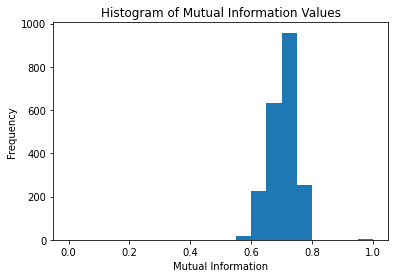

In [46]:
plt.hist(MI1, bins=20, range=(0, 1))
plt.xlabel('Mutual Information')
plt.ylabel('Frequency')
plt.title('Histogram of Mutual Information Values')
plt.show()

In [133]:
indices = np.where(MI1 < 0.5)[0]
print(indices)

[ 80 128 559 890 917]


In [ ]:
# DICE_mismatches = []
# translations = range(-80,80)
# for t in translations:
#     unshifted = x_trans_slice(t1_set_norm, t)
#     mismatch = dice_coef(unshifted, t2_set_norm)
#     DICE_mismatches.append(mismatch)
    
# plt.plot(translations, DICE_mismatches)
# plt.xlabel('translation (t)')
# plt.ylabel('Dice Coefficient')

In [ ]:
# Fine_MI_Val = []
# COE= []
# fine_mismatches = []
# fine_translations = range(-10,15)
# for t in fine_translations:
#     unshifted = fancy_xy_trans_slice(t1_set_norm, t)
#     mismatch = dice_coef(unshifted,t2_set_norm)
#     dx,dy,MI_Val= main_mi_reg(t2_set_norm,unshifted)
#     Fine_MI_Val.append(MI_Val)
#     fine_mismatches.append(mismatch)

# plt.plot(fine_translations, Fine_MI_Val)
# plt.xlabel("Fine Translations")
# plt.ylabel("Mutual information")

# best_MI = []
# best_translations =range(-5,5)
# for t in best_translations:
#     unshifted = fancy_xy_trans_slice(t1_set_norm, t)
#     dx,dy,MI_Val= main_mi_reg(t2_set_norm,unshifted)
#     best_MI.append(MI_Val)
    

# plt.plot(best_translations, best_MI)
# plt.xlabel("best Translations")
# plt.ylabel("Mutual information")
# print(best_MI)

# #finding out best translation based on max MI
# max_y = max(best_MI)  # Find the maximum y value
# max_x = best_translations[best_MI.index(max_y)]  # Find the x value corresponding to the maximum y value

# print(max_y,max_x)

In [ ]:
# unshifted = shift(t1_set_norm, [dx[P],dy[P]])
# t4_set_norm = preprocessing.normalize((unshifted))
# t2_set_norm = t2_set_norm/t2_set_norm.max()
# t3_set_norm = t3_set_norm/t3_set_norm.max()
# t4_set_norm = t4_set_norm/t4_set_norm.max()
# t1_set_norm = t1_set_norm/t1_set_norm.max()
# fig = plt.figure(figsize=(10,10))
# stacked_image =np.hstack((t3_set_norm,t4_set_norm,t1_set_norm,t2_set_norm))
# plt.imshow(stacked_image)
# plt.title("DGPS                    TRANSLATED                     GPS                           Semseg")
# plt.show()
# print(dx[T],dy[T])

In [ ]:
# dx = np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\dx105.npy')
# dy= np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\dy105.npy')
# dx1 = np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\dx71.npy')
# dy1= np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\dy71.npy')
# dx2 = np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\dx68.npy')
# dy2= np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\dy68.npy')
# dx5 = np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\dx67.npy')
# dy5= np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\dxdy\dy67.npy')

In [ ]:
# unshifted = shift(GPS_data, [dx[T],dy[T]])
# plt.title("GPS Map Vs DGPS VS translations")
# plt.imshow(np.hstack((GPS_data,DGPS_data,unshifted)))

In [ ]:
# # Definitions
# gps_map_h,gps_map_w = 160, 160
# gps_map = GPS_data
# gps_map_res_h, gps_map_res_w = 5, 5

# semseg_h, semseg_w = 160, 160
# semseg = Semseg_data
# semseg_res_h = semseg_res_w = 5
# unshifted = shift(GPS_data, [dx[T],dy[T]])


# # Compute bin centers of the semseg feature maps
# semseg_x_bin_edges = np.linspace(-semseg_w/2, semseg_w/2, semseg_w + 1) * semseg_res_w
# semseg_x_bin = (semseg_x_bin_edges[:-1] + semseg_x_bin_edges[1:]) / 2
# semseg_y_bin_edges = np.linspace(-semseg_h/2, semseg_h/2, semseg_h + 1) * semseg_res_h
# semseg_y_bin = (semseg_y_bin_edges[:-1] + semseg_y_bin_edges[1:]) / 2



# # GPS images 
# gps_x_bin_edges = np.linspace(-gps_map_w/2, gps_map_w/2, gps_map_w + 1) * gps_map_res_w
# gps_x_bin = (gps_x_bin_edges[:-1] + gps_x_bin_edges[1:]) / 2
# gps_y_bin_edges = np.linspace(-gps_map_h/2, gps_map_h/2, gps_map_h + 1) * gps_map_res_h
# gps_y_bin = (gps_y_bin_edges[:-1] + gps_y_bin_edges[1:]) / 2

# # Compute meshes
# Y, X = np.meshgrid(gps_y_bin, gps_x_bin, indexing='ij')
# Yq, Xq = np.meshgrid(semseg_y_bin, semseg_x_bin, indexing='ij')

In [ ]:
# interp_fun = LinearNDInterpolator(list(zip(X.flatten(), Y.flatten())), gps_map.flatten())
# gpsI = interp_fun(Xq,Yq)
# print(gpsI.squeeze().shape)


In [ ]:
# %matplotlib tk
# plt.figure()
# plt.imshow(np.hstack((gps_map,gpsI,semseg,unshifted)))
# #plt.imshow(gpsI, origin='lower')
# plt.title("GPS map")

In [ ]:
# plt.figure()
# plt.imshow(semseg, origin='lower')
# plt.title("SemSeg")
# plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Assuming you have the GPS and DGPS data frames stored in variables `gps_frames` and `dgps_frames` respectively

# Splitting the data into training and validation sets
gps_train, gps_val, dgps_train, dgps_val = train_test_split(GPS_data, DGPS_data, test_size=0.2, random_state=42)

# Checking the shapes of the resulting data splits
print("GPS Training data shape:", gps_train.shape)
print("GPS Validation data shape:", gps_val.shape)
print("DGPS Training data shape:", dgps_train.shape)
print("DGPS Validation data shape:", dgps_val.shape)


GPS Training data shape: (1664, 160, 160)
GPS Validation data shape: (417, 160, 160)
DGPS Training data shape: (1664, 160, 160)
DGPS Validation data shape: (417, 160, 160)


In [3]:
import torch.nn as nn
import torch.nn.functional as F
class ITN2D(nn.Module):

    def __init__(self, input_channels):
        super(ITN2D, self).__init__()
        use_bias = True
        self.conv11 = nn.Conv2d(input_channels, 2, kernel_size=3, padding=1, bias=use_bias)
        self.conv12 = nn.Conv2d(2, 4, kernel_size=3, padding=1, bias=use_bias)
        self.down1 = nn.Conv2d(4, 8, kernel_size=2, stride=2, bias=use_bias)
        self.conv21 = nn.Conv2d(8, 8, kernel_size=3, padding=1, bias=use_bias)
        self.down2 = nn.Conv2d(8, 16, kernel_size=2, stride=2, bias=use_bias)
        self.conv31 = nn.Conv2d(16, 16, kernel_size=3, padding=1, bias=use_bias)
        self.up2 = nn.ConvTranspose2d(16, 8, kernel_size=2, stride=2, bias=use_bias)
        self.conv22 = nn.Conv2d(8, 8, kernel_size=3, padding=1, bias=use_bias)
        self.up1 = nn.ConvTranspose2d(8, 4, kernel_size=2, stride=2, bias=use_bias)
        self.conv13 = nn.Conv2d(4, 2, kernel_size=3, padding=1, bias=use_bias)
        self.conv14 = nn.Conv2d(2, 2, kernel_size=3, padding=1, bias=use_bias)
        self.conv15 = nn.Conv2d(2, input_channels, kernel_size=3, padding=1, bias=use_bias)

    def forward(self, x):
        x1 = F.relu(self.conv11(x))
        x1 = F.relu(self.conv12(x1))
        x2 = self.down1(x1)
        x2 = F.relu(self.conv21(x2))
        x3 = self.down2(x2)
        x3 = F.relu(self.conv31(x3))
        x2 = self.up2(x3) + x2
        x2 = F.relu(self.conv22(x2))
        x1 = self.up1(x2) + x1
        x1 = F.relu(self.conv13(x1))
        x1 = F.relu(self.conv14(x1))
        x = self.conv15(x1)

        return x

In [19]:
import torch
from torchvision.transforms import ToTensor

# Assuming 'train_images' and 'val_images' are the training and validation sets
# Convert image arrays to PyTorch tensors and normalize to the range [0, 1]
transform = ToTensor()

train_data = torch.stack([transform(img) for img in gps_train])
val_data = torch.stack([transform(img) for img in gps_val])

In [20]:
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have defined batch_size and num_workers
batch_size = 16
num_workers = 4


# Create data loaders for training and validation
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)


In [21]:
model = ITN2D(input_channels=1)  # Instantiate the ITN2D model
loss_fn = nn.MSELoss()  # Define the loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Define the optimizer

num_epochs = 10
device = torch.device('cpu')  # Use GPU if available

model.to(device)  # Move the model to the device (GPU/CPU)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for input_imgs in train_loader:
        input_imgs = input_imgs.to(device)  # Move input tensors to the device

        optimizer.zero_grad()

        output_imgs = model(input_imgs)

        loss = loss_fn(output_imgs, input_imgs)  # Use input images as target for reconstruction

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}")

    # Perform validation on the validation set, similar to the training loop

# Training complete


RuntimeError: expected scalar type Double but found Float

In [29]:
image_array = np.load(r'C:\Users\bjqb7h\Downloads\Thesis2022\HD Maps_Cropped\DGPSRADAR\Cropped1.npy')  # Example image array
#Image.fromarray((image_array * 255).astype(np.uint8)).save(r'C:\Users\bjqb7h\Downloads\Thesis2022\HD Maps_Cropped\output.png')
image = Image.fromarray(image_array)
image.save(r'C:\Users\bjqb7h\Downloads\Thesis2022\HD Maps_Cropped\output.png')